Hikmet Terzioğlu
161101071


In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [2]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv('Tesla.csv') # 2010- 2017

# Exploratory Data Analysis

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


## Eksik Veri kontrolu

In [5]:
missing_values = df.isnull().sum()
missing_values

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [7]:
df.shape 

(1692, 6)

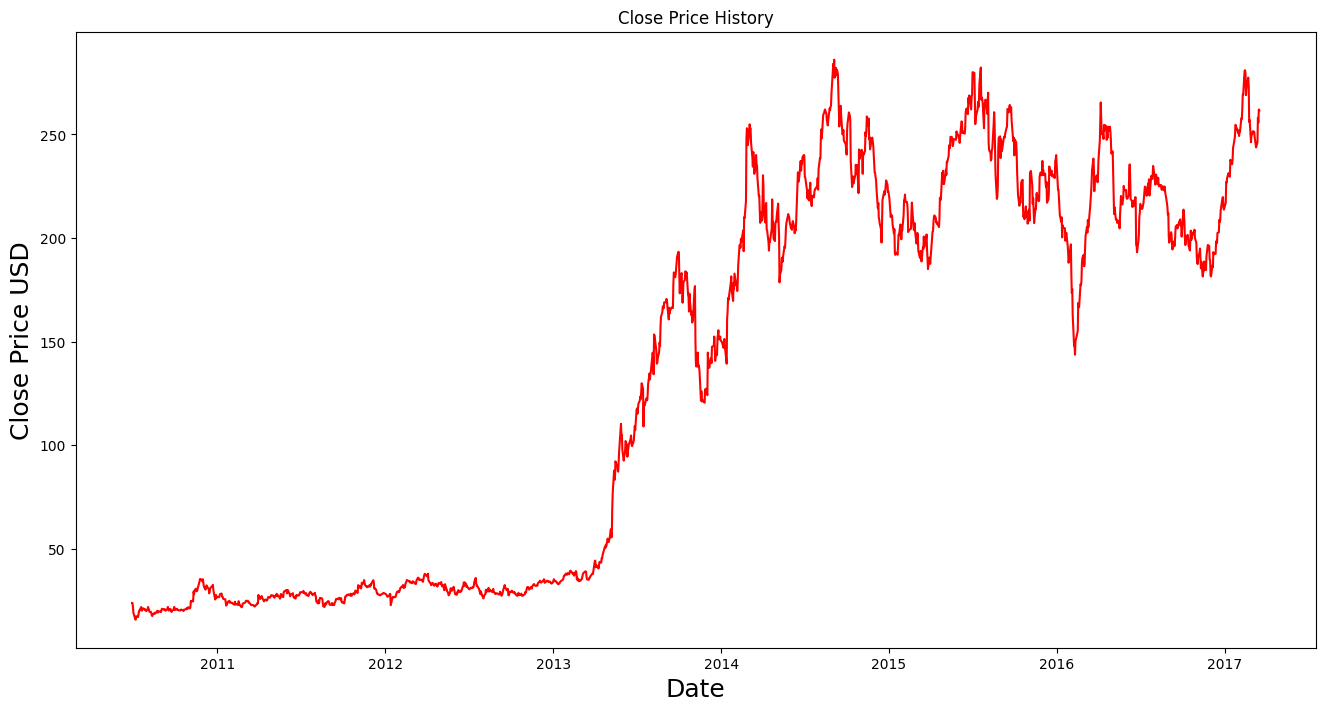

In [8]:

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [7]:
import seaborn as sns

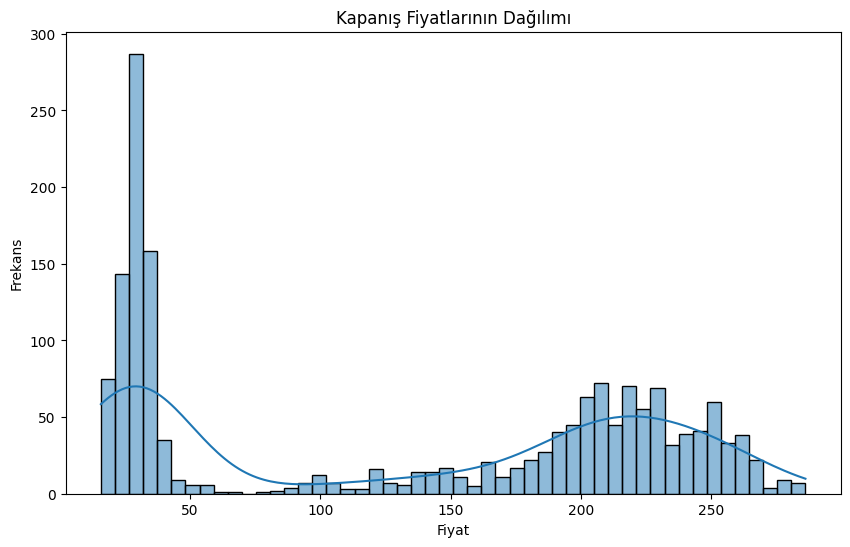

In [10]:
# Kapanış fiyatlarının dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Kapanış Fiyatlarının Dağılımı')
plt.xlabel('Fiyat')
plt.ylabel('Frekans')
plt.show()

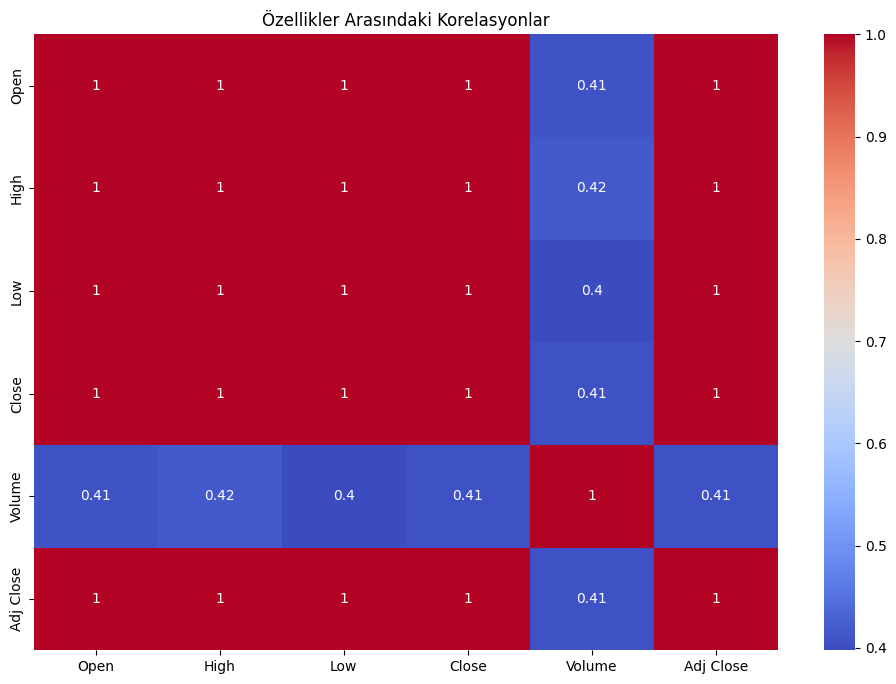

In [11]:
# Korelasyon matrisi
correlation_matrix = df.corr()

# Korelasyon matrisinin görselleştirilmesi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Özellikler Arasındaki Korelasyonlar')
plt.show()

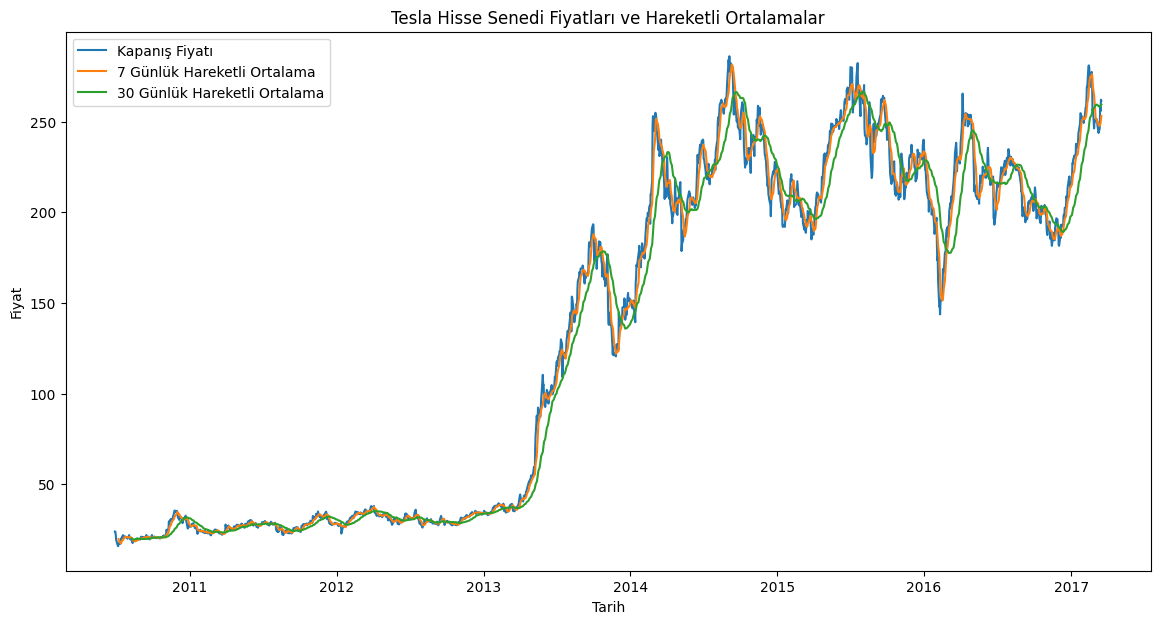

In [12]:
# Hareketli ortalama ekleme
df['7-day MA'] = df['Close'].rolling(window=7).mean()
df['30-day MA'] = df['Close'].rolling(window=30).mean()

# Kapanış fiyatları ve hareketli ortalamaların görselleştirilmesi
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Kapanış Fiyatı')
plt.plot(df['7-day MA'], label='7 Günlük Hareketli Ortalama')
plt.plot(df['30-day MA'], label='30 Günlük Hareketli Ortalama')
plt.title('Tesla Hisse Senedi Fiyatları ve Hareketli Ortalamalar')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend()
plt.show()

## PCA

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [14]:
dfPCA = df.dropna()

In [16]:
features = dfPCA.select_dtypes(include=[np.number]).columns.tolist()
xPCA = dfPCA[features].values

In [17]:
scaler = StandardScaler()
x_scaledPCA = scaler.fit_transform(xPCA)

In [18]:
pca = PCA(n_components=2)  # 2 bileşenle PCA yapalım
principalComponents = pca.fit_transform(x_scaledPCA)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

Explained variance ratio: [0.89612994 0.1012251 ]


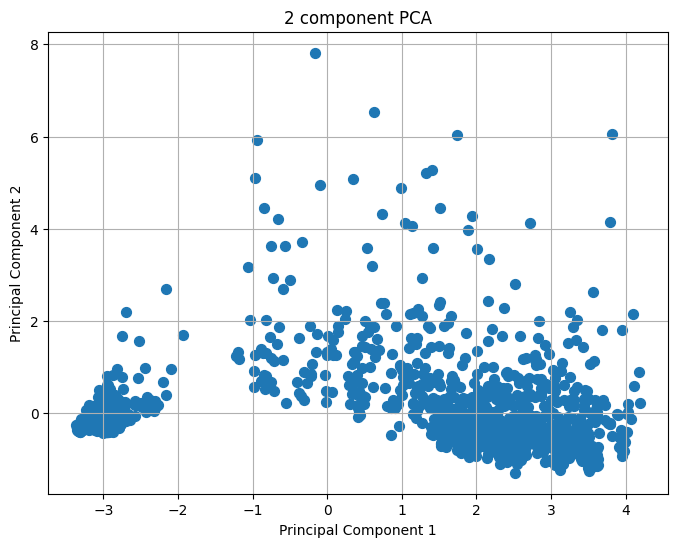

In [19]:
print('Explained variance ratio:', pca.explained_variance_ratio_)

# PCA sonuçlarını görselleştirme
plt.figure(figsize=(8,6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')
plt.grid()
plt.show()

Tesla verisinin iki ana bileşen üzerinde dağılımını göstermektedir. Verinin büyük bir kısmı merkezde yoğunlaşmış olup, bazı noktalar daha dağınık bir şekilde yayılmıştır. Bu durum, verinin ana bileşenler üzerinde çeşitlilik içerdiğini ve belirli desenler gösterdiğini ifade etmektedir.

<Figure size 1200x1000 with 0 Axes>

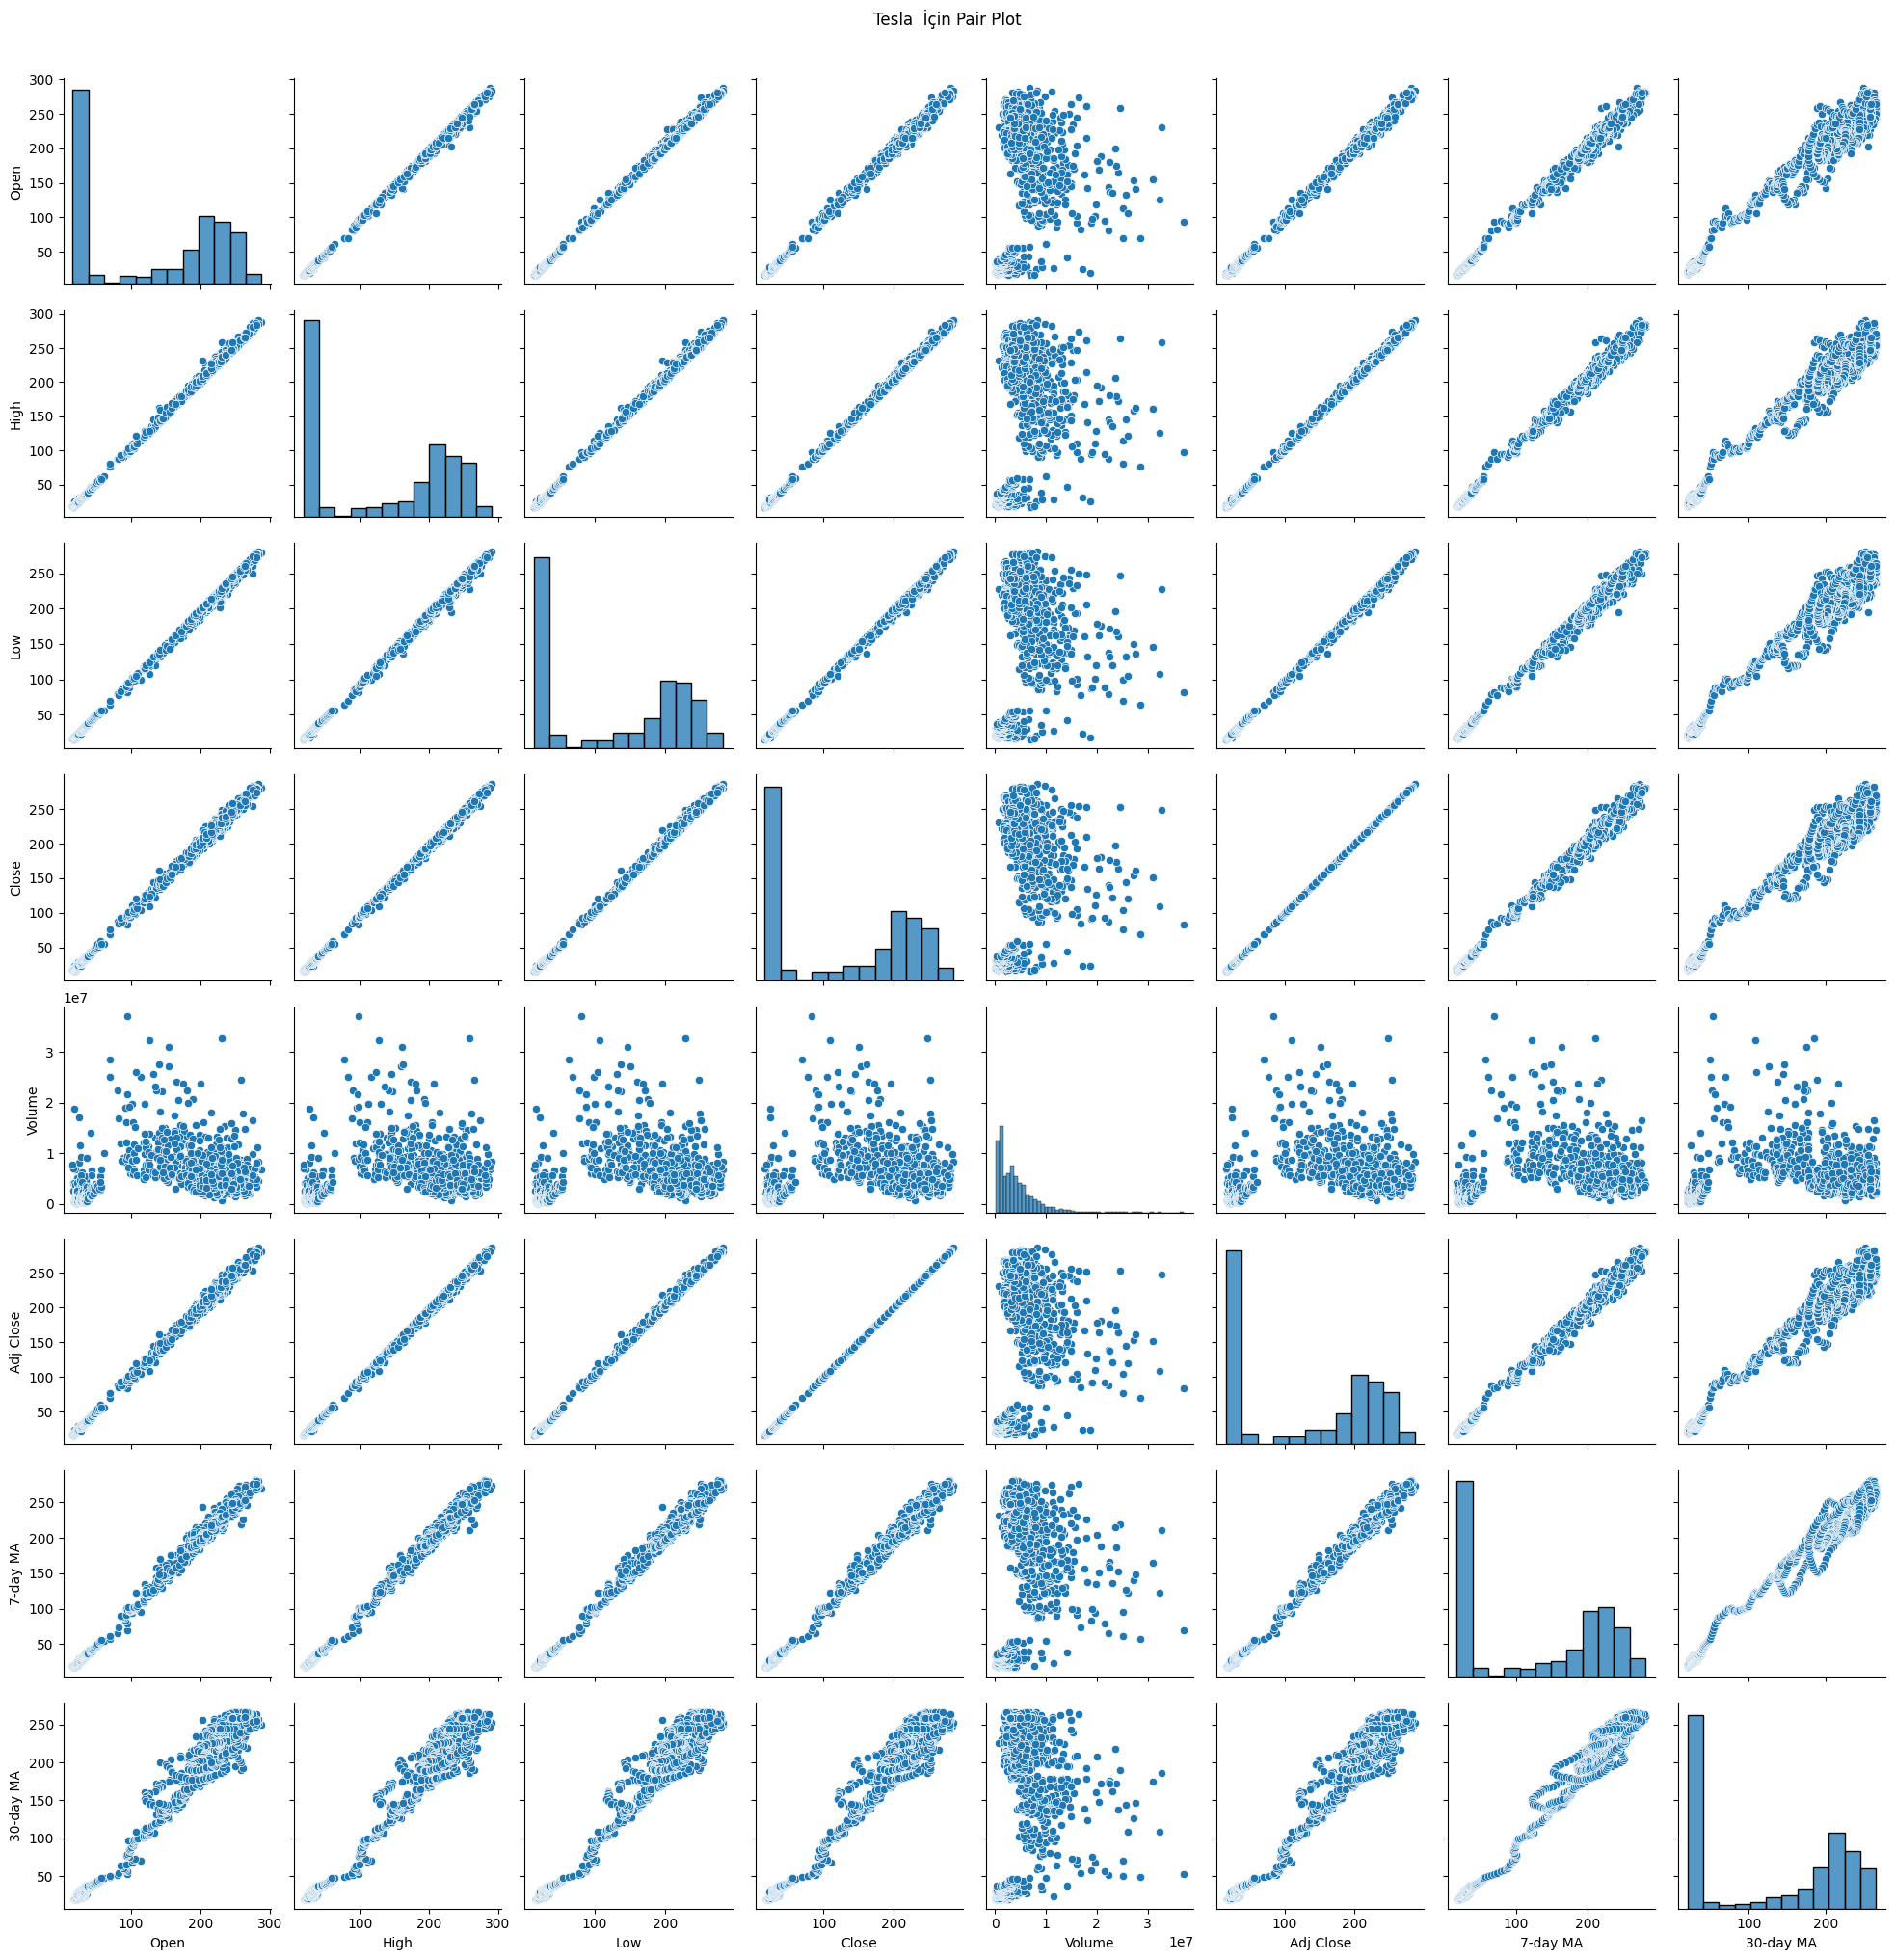

In [21]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_df = df[numeric_features]

# Pair plot çizimi
plt.figure(figsize=(12, 10))
sns.pairplot(numeric_df)
plt.suptitle('Tesla  İçin Pair Plot', y=1.02)
plt.show()

Tesla verisi için oluşturulan pair plot grafiği, verinin farklı özellikleri arasındaki ilişkileri ve dağılımları göstermektedir. 'Open', 'High', 'Low', ve 'Close' sütunları arasında yüksek korelasyon gözlemlenmektedir. 'Volume' sütununun diğer sütunlarla olan ilişkisi daha zayıftır. 

# Data Preprocessing (Veri Önişleme)

In [8]:
data = df.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on
training_data_len

1354

## Veri Ölçekleme

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]])

## Train Data Split

In [10]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.02993635, 0.02971433, 0.02279455, 0.01258141, 0.00114713,
       0.        , 0.00614268, 0.00592066, 0.00462551, 0.00865897,
       0.01494967, 0.01513469, 0.01791   , 0.02260953, 0.01665186,
       0.01635583, 0.01924215, 0.02031528, 0.01905714, 0.01757696,
       0.01820603, 0.01683689, 0.01531972, 0.01894612, 0.02275755,
       0.02020426, 0.01720693, 0.01402457, 0.01406157, 0.01195234,
       0.00777087, 0.00666075, 0.00932504, 0.01102724, 0.01239639,
       0.01099023, 0.01106424, 0.01221137, 0.01602279, 0.01258141,
       0.0151717 , 0.01461664, 0.01443162, 0.01506069, 0.01361752,
       0.01720693, 0.01946418, 0.01942717, 0.01753997, 0.01887211,
       0.01816903, 0.01617081, 0.01820603, 0.01968621, 0.02286856,
       0.01902013, 0.01639284, 0.01946418, 0.01839106, 0.01506069])]
[0.013913554154743983]



In [11]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [12]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1294, 60, 1)

# Building LSTM Model

In [13]:
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [14]:
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
history = model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
1294/1294 [==============================] - 60s 40ms/step - loss: 0.0032
Epoch 2/10
1294/1294 [==============================] - 49s 38ms/step - loss: 0.0014
Epoch 3/10
1294/1294 [==============================] - 42s 32ms/step - loss: 9.9196e-04
Epoch 4/10
1294/1294 [==============================] - 50s 38ms/step - loss: 8.7134e-04
Epoch 5/10
1294/1294 [==============================] - 50s 38ms/step - loss: 6.9043e-04
Epoch 6/10
1294/1294 [==============================] - 49s 38ms/step - loss: 5.8518e-04
Epoch 7/10
1294/1294 [==============================] - 44s 34ms/step - loss: 6.1680e-04
Epoch 8/10
1294/1294 [==============================] - 50s 38ms/step - loss: 6.3811e-04
Epoch 9/10
1294/1294 [==============================] - 49s 38ms/step - loss: 4.7806e-04
Epoch 10/10
1294/1294 [==============================] - 50s 38ms/step - loss: 4.8687e-04


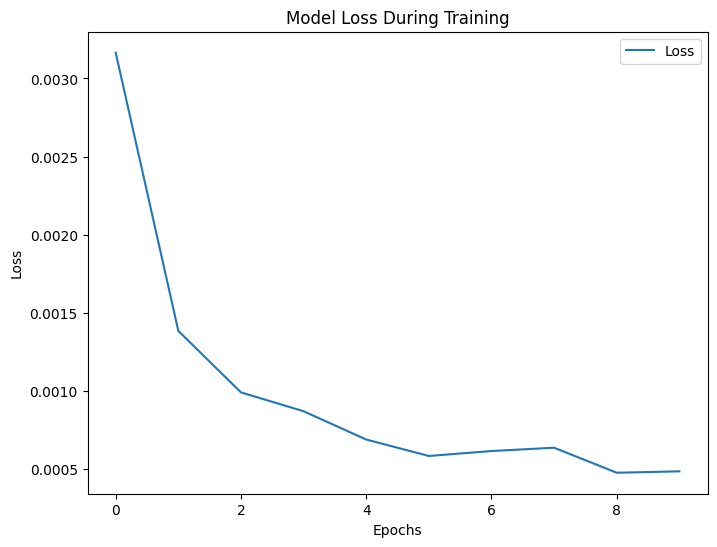

In [16]:
# Eğitim sürecindeki loss değerlerini görselleştirme
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Test Data Split

In [27]:
test_data= scaled_data[training_data_len-60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
y_trainf = dataset[:1294, :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [28]:
x_test = np.array(x_test)

In [29]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(338, 60, 1)

# Prediction of LSTM Model

## Test

In [30]:
predictions_test = model.predict(x_test)
predictions_test = scaler.inverse_transform(predictions_test)

11/11 [==============================] - 1s 48ms/step


## Train

In [31]:
predictions_train = model.predict(x_train)
predictions_train = scaler.inverse_transform(predictions_train)

41/41 [==============================] - 2s 49ms/step


## RASTGELE TEST GİRDİLERİ UZERİNDE TAHMİN YAPMA

In [32]:
import random

In [33]:
random_indices = random.sample(range(len(x_test)), 5)  # 5 rastgele örnek seç
random_test_samples = x_test[random_indices]
random_test_true_values = y_test[random_indices]

# Rastgele test girdileri üzerinde tahmin yapma
random_test_predictions = model.predict(random_test_samples)
random_test_predictions = scaler.inverse_transform(random_test_predictions)


1/1 [==============================] - 0s 48ms/step


# Results of LSTM Model

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [35]:
print("Rastgele seçilen test girdileri üzerinde tahminler:")
for i in range(len(random_test_samples)):
    print(f"Gerçek değer: {random_test_true_values[i][0]}, Tahmin edilen değer: {random_test_predictions[i][0]}")



Rastgele seçilen test girdileri üzerinde tahminler:
Gerçek değer: 217.869995, Tahmin edilen değer: 225.66143798828125
Gerçek değer: 228.360001, Tahmin edilen değer: 231.8192596435547
Gerçek değer: 234.789993, Tahmin edilen değer: 237.09942626953125
Gerçek değer: 232.559998, Tahmin edilen değer: 236.48265075683594
Gerçek değer: 191.199997, Tahmin edilen değer: 195.4806671142578


## RMSE

Train RMSE

In [36]:
rmse = np.sqrt(np.mean(predictions_train - y_trainf)**2)
rmse

13.046446330758094

Test RMSE

In [37]:
rmse = np.sqrt(np.mean(predictions_test - y_test)**2)
rmse

6.107924824969952

## MAE

Test

In [38]:
mae = np.mean(np.abs(predictions_test - y_test))
mae

6.62000316424741

Train

In [39]:
mae = np.mean(np.abs(predictions_train - y_trainf))
mae

22.442860513934882

## R^2

Test

In [40]:
from sklearn.metrics import r2_score

# Gerçek değerler ve tahmin edilen değerler
y_true = y_test
y_pred = predictions_test

# R² Hesaplama
r2 = r2_score(y_true, y_pred)
print("R²:", r2)

R²: 0.8946414514910883


Train

In [41]:
from sklearn.metrics import r2_score

# Gerçek değerler ve tahmin edilen değerler
y_true = y_trainf
y_pred = predictions_train

# R² Hesaplama
r2 = r2_score(y_true, y_pred)
print("R²:", r2)

R²: 0.8574569121634004


## MAPE

Test

In [42]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, predictions_test)
print("MAPE:", mape)

MAPE: 3.087811213269191


Train

In [43]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_trainf, predictions_train)
print("MAPE:", mape)

MAPE: 26.648040042586725


TRAIN verilerindeki prediction degerleri kotu cıkmıstır.
LOSS grafiginde train degerlerinin gosterimi yapılmıstır.

## Plotting the results

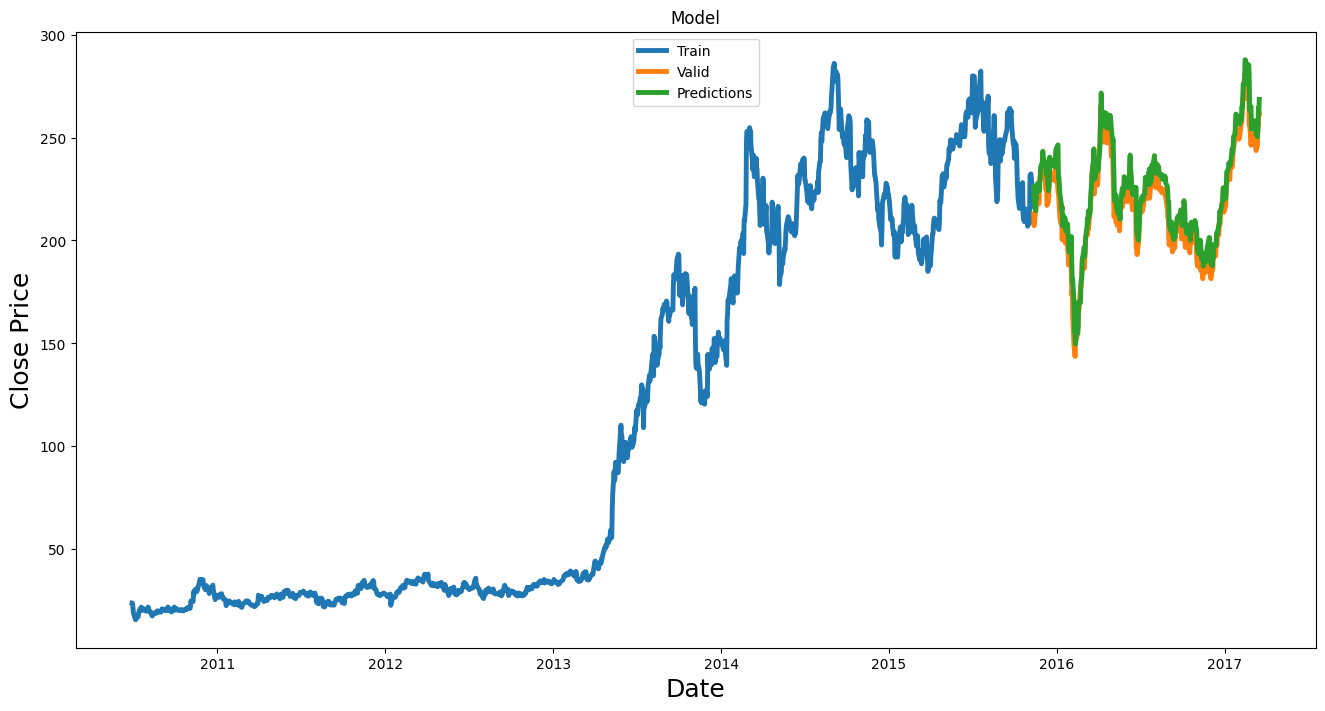

In [44]:
# Eğitim ve test verilerini ayırma
train = data[:training_data_len]
valid = data[training_data_len:].copy()

# Tahminleri valid veri setine ekleme
valid['Predictions'] = predictions_test

# Veriyi görselleştirme
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'], linewidth=3.5)
plt.plot(valid[['Close', 'Predictions']], linewidth=3.5)
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper center')
plt.show()

In [45]:
valid

,Close,Predictions
Date,,
2015-11-12,212.940002,226.085785
2015-11-13,207.190002,220.173767
2015-11-16,214.309998,214.522034
2015-11-17,214.000000,220.977676
2015-11-18,221.070007,220.447159
...,...,...
2017-03-13,246.169998,250.429169
2017-03-14,258.000000,252.893677
2017-03-15,255.729996,264.628235


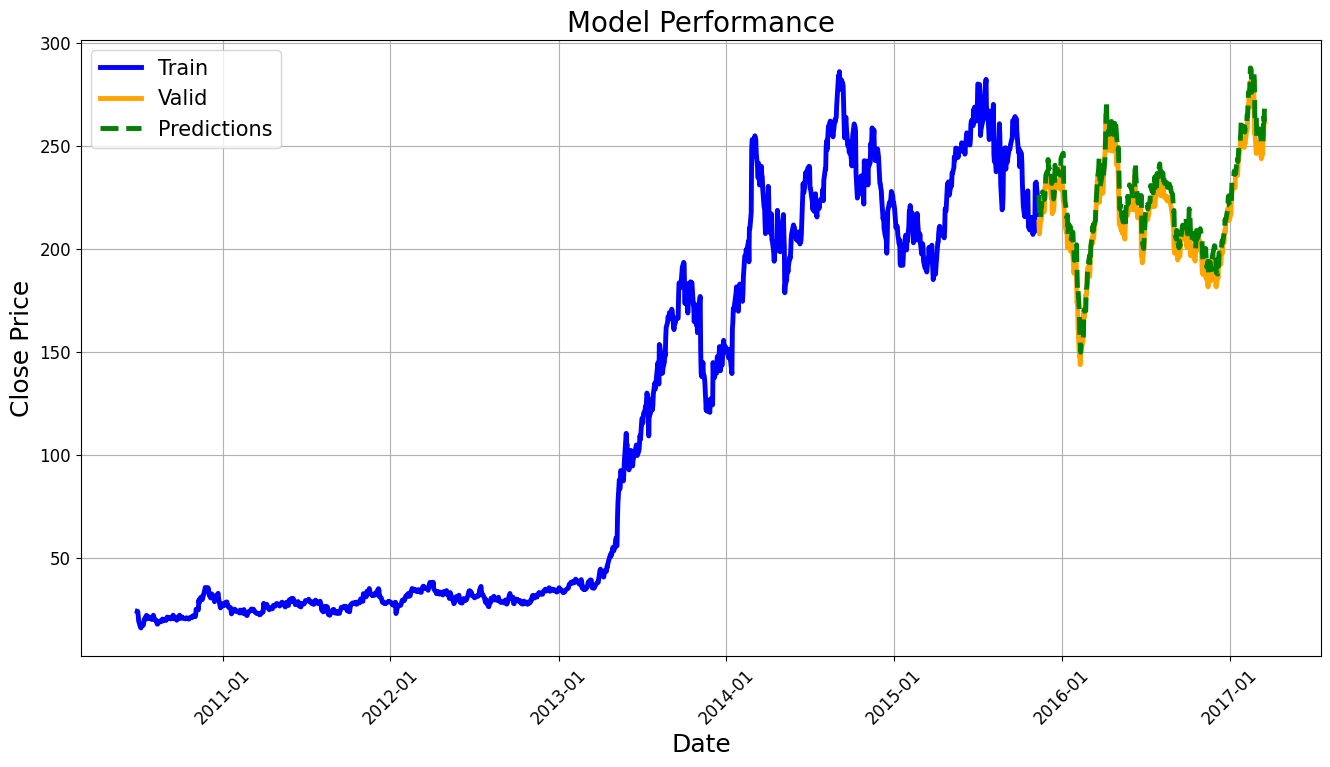

In [46]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Eğitim ve test verilerini ayırma
train = data[:training_data_len]
valid = data[training_data_len:].copy()

# Tahminleri valid veri setine ekleme
valid['Predictions'] = predictions_test

# Veriyi görselleştirme
plt.figure(figsize=(16, 8))
plt.title('Model Performance', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)

# Eğitim verisi (Train)
plt.plot(train.index, train['Close'], color='blue', label='Train', linewidth=3.5)

# Doğrulama verisi (Valid) ve Tahminler (Predictions)
plt.plot(valid.index, valid['Close'], color='orange', label='Valid', linewidth=3.5)
plt.plot(valid.index, valid['Predictions'], color='green', label='Predictions', linewidth=3.5, linestyle='dashed')

# Eksen formatlama
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Grid ve legend ekleme
plt.grid(True)
plt.legend(loc='upper left', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Gösterim
plt.show()

# Building  RNN Model

In [47]:
dataRNN = pd.read_csv("./Tesla.csv")
dataRNN.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [48]:
train_dfRNN=dataRNN[:1300]
test_dfRNN=dataRNN[1300:]

In [49]:
trainRnn=train_dfRNN.loc[:,["Open"]].values

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_scaled=scaler.fit_transform(trainRnn)

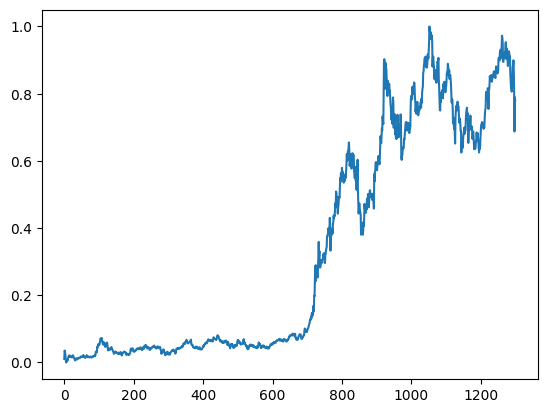

In [51]:
plt.plot(train_scaled)
plt.show()

In [52]:
X_train=[]
y_train=[]
timesteps=50
for i in range(timesteps,len(train_scaled)):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [53]:
#reshaping
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [55]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

Epoch 1/10
40/40 [==============================] - 8s 62ms/step - loss: 0.2775
Epoch 2/10
40/40 [==============================] - 2s 50ms/step - loss: 0.1637
Epoch 3/10
40/40 [==============================] - 2s 54ms/step - loss: 0.1011
Epoch 4/10
40/40 [==============================] - 2s 56ms/step - loss: 0.0726
Epoch 5/10
40/40 [==============================] - 2s 56ms/step - loss: 0.0587
Epoch 6/10
40/40 [==============================] - 2s 58ms/step - loss: 0.0453
Epoch 7/10
40/40 [==============================] - 2s 49ms/step - loss: 0.0393
Epoch 8/10
40/40 [==============================] - 2s 58ms/step - loss: 0.0314
Epoch 9/10
40/40 [==============================] - 2s 51ms/step - loss: 0.0285
Epoch 10/10
40/40 [==============================] - 2s 56ms/step - loss: 0.0256


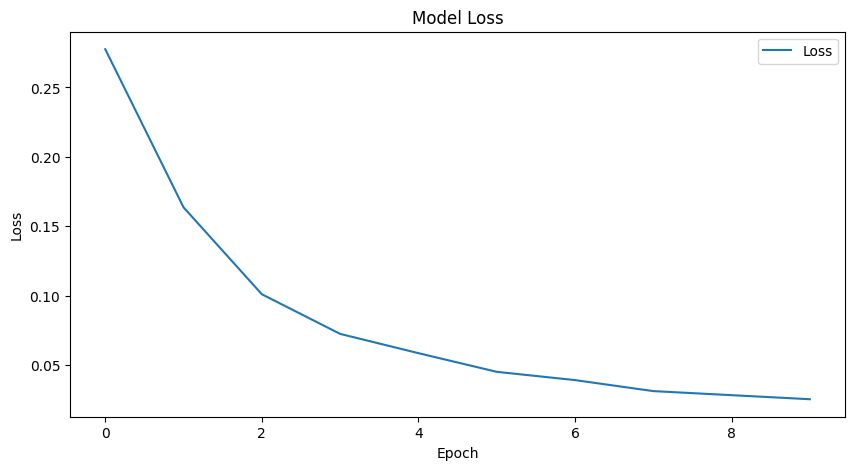

In [56]:
regressor = Sequential()

regressor.add(SimpleRNN(units=50, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units=50, activation="tanh", return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units=50, activation="tanh", return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))
regressor.compile(optimizer="adam", loss="mean_squared_error")

# Modeli eğitme ve history nesnesini kaydetme
history = regressor.fit(X_train, y_train, epochs=10, batch_size=32)

# Loss değerlerini görselleştirme
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predictions and Visualizing RNN Model

In [57]:
real_stock_price=test_dfRNN.loc[:,["Open"]].values

In [67]:
real_stock_price_train=train_dfRNN.loc[:,["Open"]].values

In [251]:
dataset_total=pd.concat((train_dfRNN["Open"],test_dfRNN["Open"]), axis=0)
inputs= dataset_total[len(dataset_total)-len(test_dfRNN)-timesteps:].values.reshape(-1,1)
inputs=scaler.transform(inputs)

## Test and Train

In [59]:
dataset_total = pd.concat((train_dfRNN["Open"], test_dfRNN["Open"]), axis=0)

# Giriş dizilerini oluşturun ve ölçeklendirin
train_inputs = dataset_total[:len(train_dfRNN) + timesteps].values.reshape(-1, 1)
test_inputs = dataset_total[len(dataset_total) - len(test_dfRNN) - timesteps:].values.reshape(-1, 1)

train_inputs = scaler.transform(train_inputs)
test_inputs = scaler.transform(test_inputs)

# Eğitim verisi için tahmin yapın
X_train_pred = []
for i in range(timesteps, len(train_inputs)):
    X_train_pred.append(train_inputs[i-timesteps:i, 0])

X_train_pred = np.array(X_train_pred)
X_train_pred = np.reshape(X_train_pred, (X_train_pred.shape[0], X_train_pred.shape[1], 1))
predicted_stock_price_train = regressor.predict(X_train_pred)
predicted_stock_price_train = scaler.inverse_transform(predicted_stock_price_train)

# Test verisi için tahmin yapın
X_test = []
for i in range(timesteps, timesteps + len(test_dfRNN)):
    X_test.append(test_inputs[i-timesteps:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price_test = regressor.predict(X_test)
predicted_stock_price_test = scaler.inverse_transform(predicted_stock_price_test)

13/13 [==============================] - 0s 25ms/step


In [252]:
#prediction
X_test=[]
for i in range(timesteps,timesteps+len(test_dfRNN)):
    X_test.append(inputs[i-timesteps:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)#we had scaled between 0-1 data, inversing it

13/13 [==============================] - 1s 19ms/step


## Rastgele Test Girdileri ile Tahmin

In [60]:
import random

In [61]:
random_indices = random.sample(range(len(X_test)), 5)  # 5 rastgele örnek seç
random_test_samples = X_test[random_indices]
random_test_true_values = real_stock_price[random_indices]

# Rastgele test girdileri üzerinde tahmin yapma
random_test_predictions = regressor.predict(random_test_samples)
random_test_predictions = scaler.inverse_transform(random_test_predictions)

1/1 [==============================] - 0s 64ms/step


# Results of RNN Model

In [62]:
print("Rastgele seçilen test girdileri üzerinde tahminler:")
for i in range(len(random_test_samples)):
    print(f"Gerçek değer: {random_test_true_values[i][0]}, Tahmin edilen değer: {random_test_predictions[i][0]}")

Rastgele seçilen test girdileri üzerinde tahminler:
Gerçek değer: 159.0, Tahmin edilen değer: 170.27464294433594
Gerçek değer: 250.460007, Tahmin edilen değer: 280.9696350097656
Gerçek değer: 228.460007, Tahmin edilen değer: 272.1864929199219
Gerçek değer: 212.009995, Tahmin edilen değer: 249.65635681152344
Gerçek değer: 192.380005, Tahmin edilen değer: 235.7881317138672


## Plotting the results

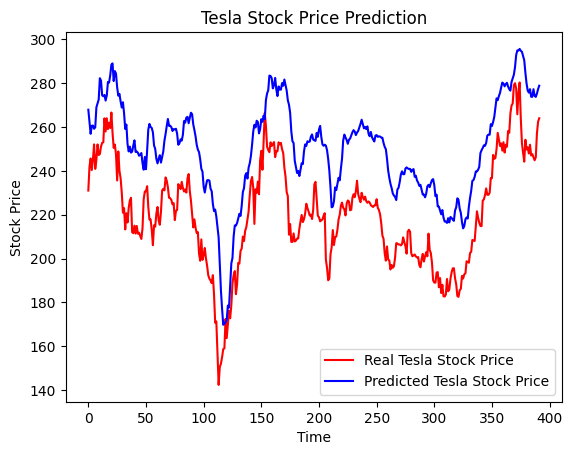

In [64]:
#visualising
plt.plot(real_stock_price,color="red",label="Real Tesla Stock Price")
plt.plot(predicted_stock_price_test,color="blue",label="Predicted Tesla Stock Price")
plt.title("Tesla Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

## RMSE

Test

In [65]:
rmse = np.sqrt(np.mean(predicted_stock_price_test - real_stock_price)**2)
rmse

29.498959469342918

Train

In [68]:
rmse = np.sqrt(np.mean(predicted_stock_price_train - real_stock_price_train)**2)
rmse

22.536386526713493

## MAE

Test

In [69]:
mae = np.mean(np.abs(predicted_stock_price_test - real_stock_price))
mae

29.52099977616291

Train

In [70]:
mae = np.mean(np.abs(predicted_stock_price_train - real_stock_price_train))
mae

27.171922781247932

## R^2

Test

In [72]:
from sklearn.metrics import r2_score

# Gerçek değerler ve tahmin edilen değerler
y_true = real_stock_price
y_pred = predicted_stock_price_test

# R² Hesaplama
r2 = r2_score(y_true, y_pred)
print("R²:", r2)

R²: -0.6381703613622138


Train


In [73]:
from sklearn.metrics import r2_score

# Gerçek değerler ve tahmin edilen değerler
y_true = real_stock_price_train
y_pred = predicted_stock_price_train

# R² Hesaplama
r2 = r2_score(y_true, y_pred)
print("R²:", r2)

R²: 0.7953724132820508


## MAPE

Test

In [74]:
y_true = real_stock_price
y_pred = predicted_stock_price_test

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_true, y_pred)
print("MAPE:", mape)

MAPE: 13.750341860974627


Train

In [77]:
y_true = real_stock_price_train
y_pred = predicted_stock_price_train

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_true, y_pred)
print("MAPE:", mape)

MAPE: 34.339669631145945


# BUILDING ARIMA MODEL

In [78]:
dfArima = pd.read_csv("./Tesla.csv")

In [79]:
dfArima = dfArima.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)

In [80]:
dfArima

,Date,Adj Close
0,6/29/2010,23.889999
1,6/30/2010,23.830000
2,7/1/2010,21.959999
3,7/2/2010,19.200001
4,7/6/2010,16.110001
...,...,...
1687,3/13/2017,246.169998
1688,3/14/2017,258.000000
1689,3/15/2017,255.729996
1690,3/16/2017,262.049988


C:\Users\HP\AppData\Local\Temp\ipykernel_13292\4210588612.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(dfArima['Adj Close'], fit=norm)


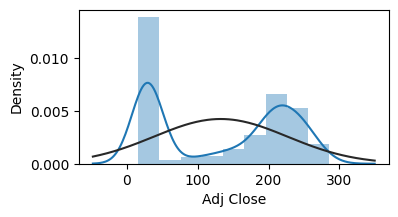

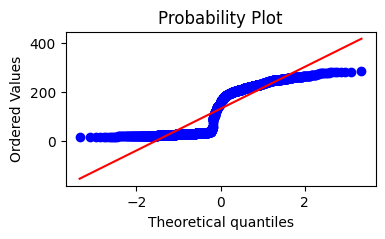

In [81]:
from scipy.stats import norm, skew 
from scipy import stats 
import statsmodels.api as sm 
import seaborn as sb
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 4,2

sb.distplot(dfArima['Adj Close'], fit=norm)

#Get the QQ-plot
fig = plt.figure()
res = stats.probplot(dfArima['Adj Close'], plot=plt)
plt.show()

1. Üst Grafik: Yoğunluk Grafiği (Density Plot)
Histogram: Verilerin dağılımını çubuklar halinde gösterir.
Yoğunluk Eğrisi: Histogramın üzerine oturtulmuş, verilerin olasılık yoğunluğunu gösteren düzgün bir eğri. Bu eğri, verilerin dağılımının daha pürüzsüz bir temsilidir.
Bu grafik, hisse senedinin düzeltilmiş kapanış fiyatlarının iki farklı yoğunluk bölgesinde toplandığını gösteriyor. İlk yoğunluk bölgesi 0'a yakınken, ikinci yoğunluk bölgesi 200 civarında. Bu da hisse fiyatlarının iki farklı aralıkta yoğunlaştığını ve arada daha az veri bulunduğunu gösterir.

2. Alt Grafik: Olasılık Grafiği (Probability Plot)
Ordered Values: Dikey eksende verinin sıralanmış değerleri.
Theoretical Quantiles: Yatay eksende teorik kuantiller.
Kırmızı Çizgi: Normal dağılımı gösteren doğrusal bir referans çizgisi.
Bu grafik, verilerin normal dağılıma ne kadar uyduğunu kontrol etmek için kullanılır. Veriler (mavi noktalar) kırmızı çizgiye ne kadar yakınsa, veriler normal dağılıma o kadar yakındır. Bu grafikte, özellikle düşük ve yüksek uçlarda verilerin kırmızı çizgiden saptığını görmekteyiz, bu da verilerin normal dağılımdan sapma gösterdiğini belirtir.

Genel Yorum:
Yoğunluk Grafiği: Hisse fiyatlarının iki farklı yoğunluk bölgesine sahip olduğunu, yani verilerin iki farklı fiyat aralığında toplandığını gösteriyor.
Olasılık Grafiği: Verilerin normal dağılıma tam olarak uymadığını, özellikle uç değerlerde (en düşük ve en yüksek değerler) normal dağılımdan sapmalar olduğunu gösteriyor.

In [82]:
dfArima = dfArima.groupby('Date')['Adj Close'].sum().reset_index()

In [83]:
dfArima.Date=pd.to_datetime(dfArima.Date)
dfArima

,Date,Adj Close
0,2011-01-10,28.450001
1,2012-01-10,27.620001
2,2013-01-10,33.529999
3,2014-01-10,145.720001
4,2017-01-10,229.869995
...,...,...
1687,2011-09-09,22.969999
1688,2013-09-09,160.699997
1689,2014-09-09,278.480011
1690,2015-09-09,248.910004


In [84]:
dfArima.set_index(['Date'],inplace=True)
dfArima.head()

,Adj Close
Date,
2011-01-10,28.450001
2012-01-10,27.620001
2013-01-10,33.529999
2014-01-10,145.720001
2017-01-10,229.869995


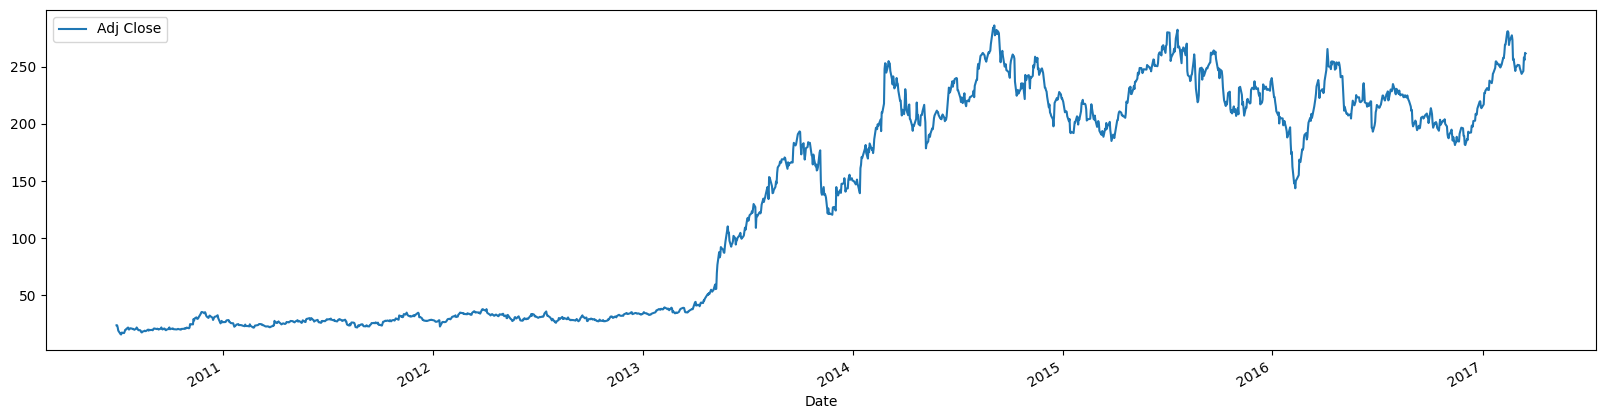

In [85]:
dfArima.plot(figsize=(20,5))
plt.show()

## Checking for stationarity using Augmented Dickey Fuller Test



In [86]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(trends):
    result = adfuller(trends)
    labels = ['ADF Test Statistic','p-value','#Lags Used','#Observation Used']
    for value,label in zip(result,labels):
        print(label  + ': ' + str(value))
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary')
    else:
        print('week evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.')
        
adfuller_test(df['Adj Close'])

ADF Test Statistic: -0.8137329693176629
p-value: 0.8150547908640394
#Lags Used: 0
#Observation Used: 1691
week evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.


ADF Test Statistic: -15.611646164463759
p-value: 1.7767598487445608e-28
#Lags Used: 25
#Observation Used: 1665
Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary


<AxesSubplot: xlabel='Date'>

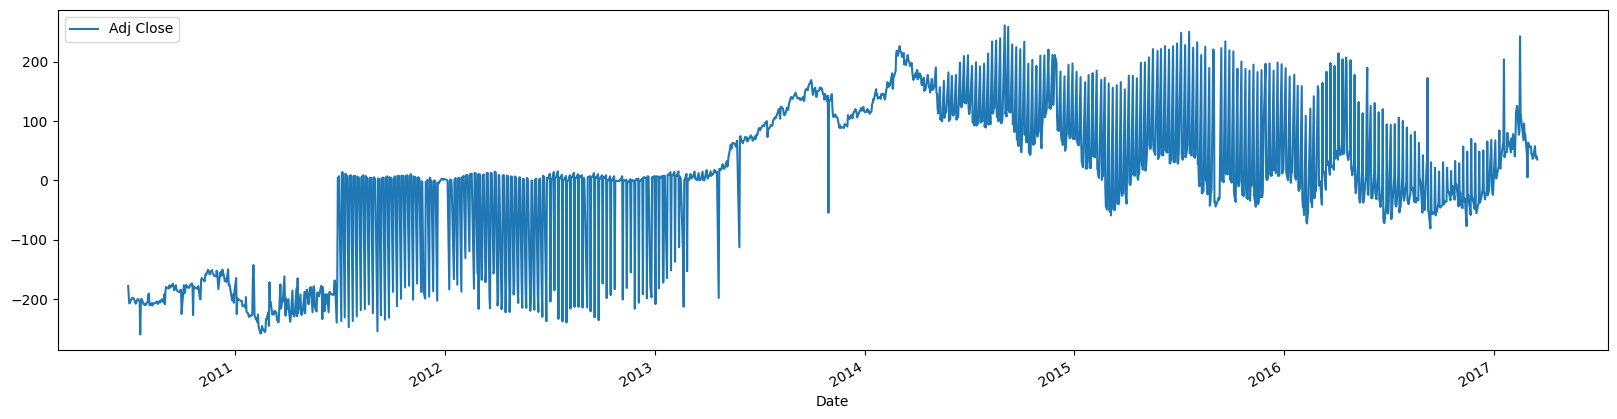

In [87]:
diff1=dfArima-dfArima.shift(1)
diff1=diff1.dropna()
adfuller_test(diff1)
diff1.plot(figsize=(20,5))

## Plotting Autocorrelation and Partial Autocorreltion functions to find the number of lags:



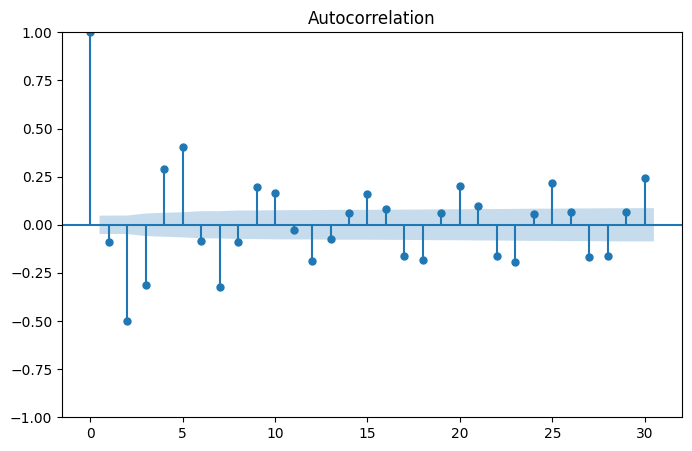

In [88]:
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(8, 5))
plot_acf(diff1['Adj Close'], ax=ax, lags=30)
plt.show()

## Finding the most optimal values of p and q:



In [89]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
for i in range(1,7):
    for j in range(1,7):
        model=ARIMA(dfArima['Adj Close'],order=(i,0,j))
        result=model.fit()
        print(f"AIC :{result.aic}, Order Of AR: {i}, Order of MA:{j} ") 

AIC :19988.946751048818, Order Of AR: 1, Order of MA:1 
AIC :19737.691265930334, Order Of AR: 1, Order of MA:2 
AIC :19646.066298719405, Order Of AR: 1, Order of MA:3 
AIC :19492.429574876176, Order Of AR: 1, Order of MA:4 
AIC :19373.1909526591, Order Of AR: 1, Order of MA:5 
AIC :19333.45563926938, Order Of AR: 1, Order of MA:6 
AIC :19406.54668496379, Order Of AR: 2, Order of MA:1 
AIC :19289.96343440994, Order Of AR: 2, Order of MA:2 
AIC :19291.03442652575, Order Of AR: 2, Order of MA:3 
AIC :19281.329923010533, Order Of AR: 2, Order of MA:4 
AIC :19263.660447787523, Order Of AR: 2, Order of MA:5 
AIC :19263.31409499438, Order Of AR: 2, Order of MA:6 
AIC :19342.878140233828, Order Of AR: 3, Order of MA:1 
AIC :19290.319987711933, Order Of AR: 3, Order of MA:2 
AIC :19290.354259106018, Order Of AR: 3, Order of MA:3 
AIC :19263.30915427633, Order Of AR: 3, Order of MA:4 
AIC :19260.432170790707, Order Of AR: 3, Order of MA:5 
AIC :19262.172263230885, Order Of AR: 3, Order of MA:6 


In [97]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# ARIMA modelini eğit
model = ARIMA(train['Adj Close'], order=(6,1,6))
result = model.fit()

In [106]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1353
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -3859.589
Date:                Wed, 07 Aug 2024   AIC                           7745.179
Time:                        00:43:17   BIC                           7812.900
Sample:                             0   HQIC                          7770.538
                               - 1353                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2730      0.865     -0.315      0.752      -1.969       1.423
ar.L2         -0.0288      0.466     -0.062      0.951      -0.942       0.885
ar.L3          0.4114      0.352      1.167      0.243      -0.279       1.102
ar.L4         -0.0780      0.372     -0.210      0.834      -0.807       0.651
ar.L5         -0.5007      0.313     -1.602      0.109      -1.113       0.112
ar.L6         -0.7246      0.685     -1.058      0.290      -2.067       0.618
ma.L1          0.2835      0.869      0.326      0.744      -1.419       1.986
ma.L2          0.0234      0.455      0.051      0.959      -0.869       0.916
ma.L3         -0.4449      0.345     -1.290      0.197      -1.121       0.231
ma.L4          0.0453      0.381      0.119      0.905      -0.701       0.792
ma.L5          0.5177      0.316      1.641      0.101      -0.101       1.136
ma.L6          0.7381      0.710      1.039      0.299      -0.654       2.130
sigma2        17.6487      0.302     58.364      0.000      17.056      18.241
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4950.93
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              37.87   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
modelArima=ARIMA(df['Adj Close'],order=(6,1,6))
result=modelArima.fit()
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1692
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -4893.299
Date:                Wed, 07 Aug 2024   AIC                           9812.597
Time:                        00:46:48   BIC                           9883.227
Sample:                             0   HQIC                          9838.752
                               - 1692                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1085      4.922     -0.022      0.982      -9.756       9.539
ar.L2          0.3883      0.492      0.788      0.430      -0.577       1.354
ar.L3          0.5043      1.565      0.322      0.747      -2.564       3.572
ar.L4         -0.6241      2.344     -0.266      0.790      -5.218       3.970
ar.L5         -0.5880      3.487     -0.169      0.866      -7.423       6.247
ar.L6         -0.0226      2.138     -0.011      0.992      -4.213       4.168
ma.L1          0.1349      4.921      0.027      0.978      -9.511       9.781
ma.L2         -0.3905      0.401     -0.974      0.330      -1.176       0.395
ma.L3         -0.5383      1.609     -0.334      0.738      -3.692       2.616
ma.L4          0.5921      2.495      0.237      0.812      -4.299       5.483
ma.L5          0.6270      3.365      0.186      0.852      -5.969       7.223
ma.L6          0.0340      2.343      0.015      0.988      -4.559       4.627
sigma2        19.2915      0.330     58.504      0.000      18.645      19.938
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3471.81
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              27.24   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Prediciton of Arima Model

## Train

<AxesSubplot: xlabel='Date'>

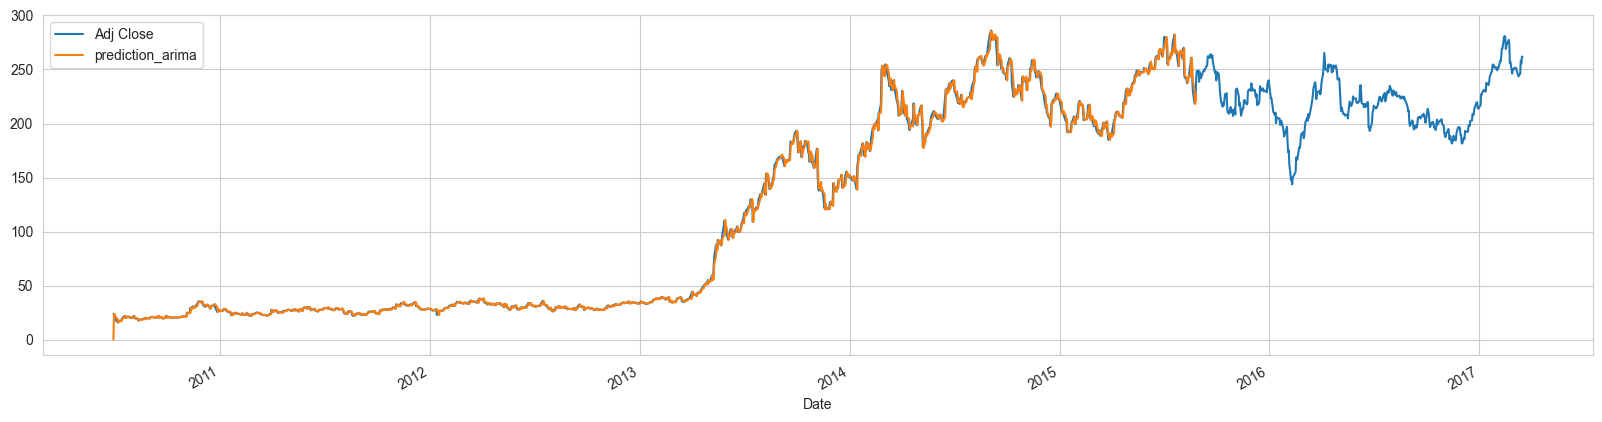

In [111]:
dfArima['prediction_arima']=result.predict(start=0,end=1300)
dfArima[["Adj Close","prediction_arima"]].plot(figsize=(20,5))

## Test

<AxesSubplot: xlabel='Date'>

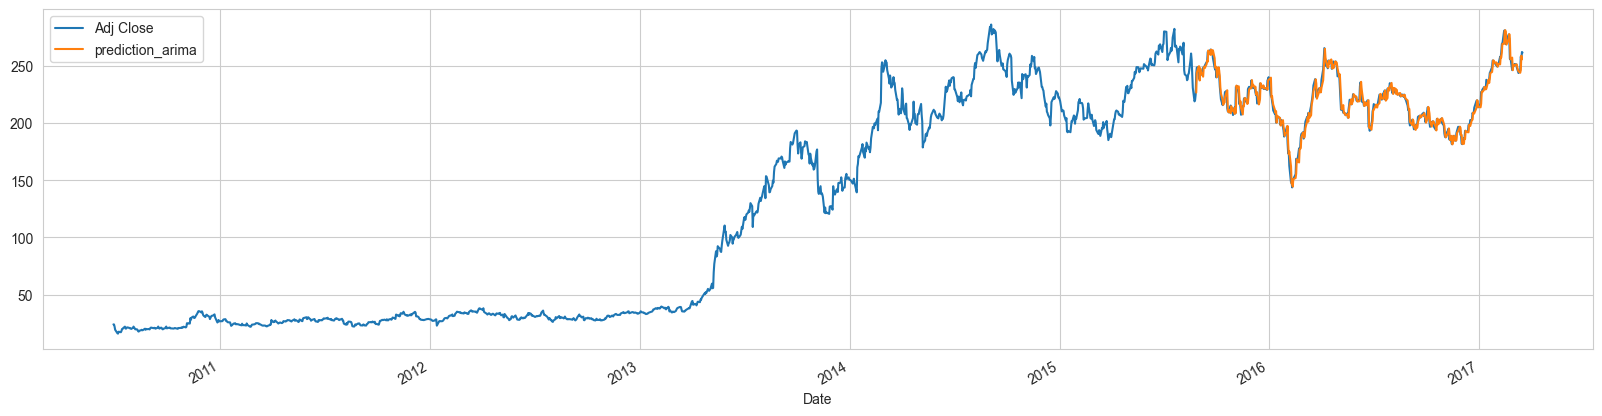

In [113]:
dfArima['prediction_arima']=result.predict(start=1300,end=1690)
dfArima[["Adj Close","prediction_arima"]].plot(figsize=(20,5))

## Rastgele Test Girdileri ile Tahmin 


In [116]:
random_indices = np.random.choice(test.index, size=3, replace=False)
random_test_samples = test.loc[random_indices]

# Seçilen rastgele test girdileri üzerinde tahmin yapma
random_predictions = result.predict(start=random_test_samples.index[0], end=random_test_samples.index[-1], typ='levels')

# Seçilen rastgele test girdileri ve tahminleri gösterme
print("Rastgele Seçilen Test Girdileri:\n", random_test_samples)
print("Rastgele Test Girdileri Üzerinde Tahminler:\n", random_predictions)

Rastgele Seçilen Test Girdileri:
                   Open        High         Low       Close   Volume  \
Date                                                                  
2016-02-17  159.000000  169.339996  156.679993  168.679993  5825200   
2016-02-08  157.100006  157.149994  146.000000  147.990005  9313000   
2016-08-29  220.149994  220.399994  215.000000  215.199997  3266300   

             Adj Close  
Date                    
2016-02-17  168.679993  
2016-02-08  147.990005  
2016-08-29  215.199997  
Rastgele Test Girdileri Üzerinde Tahminler:
 Date
2016-02-17    155.663463
2016-02-18    168.362710
2016-02-19    166.760483
2016-02-22    165.477579
2016-02-23    176.985903
                 ...    
2016-08-23    223.003316
2016-08-24    224.516426
2016-08-25    221.938422
2016-08-26    221.076131
2016-08-29    219.673807
Name: predicted_mean, Length: 136, dtype: float64


# Results Of ARIMA model

## TUM METRIKLER TEST VE TRAIN ICIN

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1353
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -3859.589
Date:                Wed, 07 Aug 2024   AIC                           7745.179
Time:                        01:04:29   BIC                           7812.900
Sample:                             0   HQIC                          7770.538
                               - 1353                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2730      0.865     -0.315      0.752      -1.969       1.423
ar.L2         -0.0288      0.466     -0.062      0.951      -0.942       0.885
ar.L3          0.4114      0.352      1.167      0.2

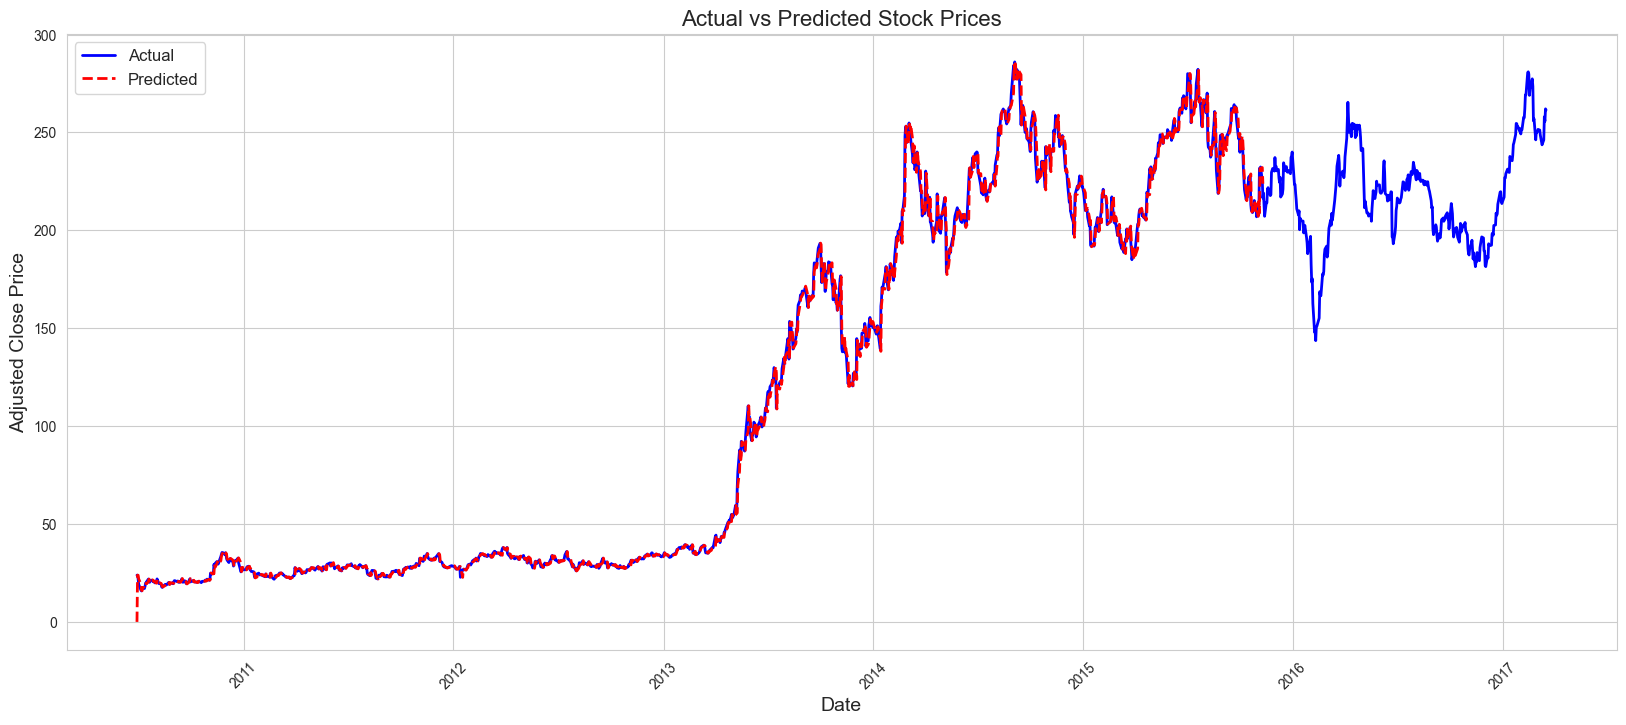

In [119]:
model = ARIMA(train['Adj Close'], order=(6,1,6))
result = model.fit()
print(result.summary())

# Eğitim veri seti üzerinde tahmin yap
train_predictions = result.predict(start=0, end=len(train)-1, typ='levels')

# Eğitim veri seti üzerindeki hata hesaplamaları
train_rmse = mean_squared_error(train['Adj Close'], train_predictions, squared=False)
train_mae = mean_absolute_error(train['Adj Close'], train_predictions)
train_mape = np.mean(np.abs((train['Adj Close'] - train_predictions) / train['Adj Close'])) * 100
train_r2 = r2_score(train['Adj Close'], train_predictions)

print(f'Eğitim Verisi RMSE: {train_rmse}')
print(f'Eğitim Verisi MAE: {train_mae}')
print(f'Eğitim Verisi MAPE: {train_mape}')
print(f'Eğitim Verisi R2: {train_r2}')

# Test veri seti üzerinde tahmin yap
test_start = len(train)
test_end = len(train) + len(test) - 1
test_predictions = result.predict(start=test_start, end=test_end, typ='levels')

# Test veri seti üzerindeki hata hesaplamaları
test_rmse = mean_squared_error(test['Adj Close'], test_predictions, squared=False)
test_mae = mean_absolute_error(test['Adj Close'], test_predictions)
test_mape = np.mean(np.abs((test['Adj Close'] - test_predictions) / test['Adj Close'])) * 100
test_r2 = r2_score(test['Adj Close'], test_predictions)

print(f'Test Verisi RMSE: {test_rmse}')
print(f'Test Verisi MAE: {test_mae}')
print(f'Test Verisi MAPE: {test_mape}')
print(f'Test Verisi R2: {test_r2}')

# Eğitim ve test veri seti için tahminleri birleştir
combined = pd.concat([pd.Series(train_predictions, index=train.index), pd.Series(test_predictions, index=test.index)])

# Grafik oluşturma
plt.figure(figsize=(20, 8))
sns.set_style("whitegrid")

plt.plot(df.index, df['Adj Close'], label='Actual', color='blue', linestyle='-', linewidth=2)
plt.plot(combined.index, combined, label='Predicted', color='red', linestyle='--', linewidth=2)

plt.title('Actual vs Predicted Stock Prices', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Forecasting Stock Price for the next 30 days:



In [121]:
fc = result.forecast(30, alpha=0.05)
for i in fc:
    print(round(i,0))

216.0
216.0
216.0
216.0
217.0
218.0
218.0
218.0
219.0
218.0
217.0
217.0
216.0
216.0
216.0
217.0
217.0
218.0
218.0
219.0
218.0
218.0
217.0
217.0
216.0
216.0
216.0
217.0
217.0
218.0


In [122]:
import pandas as pd

# Tesla verileri
data = {
    'Date': [
        '2017-03-20', '2017-03-21', '2017-03-22', '2017-03-23', '2017-03-24', '2017-03-27',
        '2017-03-28', '2017-03-29', '2017-03-30', '2017-03-31', '2017-04-03', '2017-04-04',
        '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-10', '2017-04-11', '2017-04-12',
        '2017-04-13', '2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20', '2017-04-21'
    ],
    'Open': [
        262.48, 260.00, 259.10, 259.00, 258.00, 255.99, 260.69, 278.70, 279.19, 278.42,
        278.25, 286.95, 287.61, 291.24, 292.50, 294.20, 303.75, 309.00, 313.65, 310.00,
        313.89, 306.05, 307.29, 304.35
    ],
    'High': [
        264.80, 260.40, 261.68, 262.49, 259.25, 258.00, 277.78, 280.60, 280.13, 278.65,
        287.39, 288.39, 292.75, 294.15, 295.00, 306.81, 308.64, 313.73, 314.00, 313.27,
        314.50, 309.47, 307.80, 305.39
    ],
    'Low': [
        259.10, 256.77, 256.60, 257.80, 256.16, 253.92, 260.00, 276.34, 276.72, 276.01,
        276.79, 283.30, 287.50, 290.60, 291.60, 294.10, 301.50, 307.22, 308.27, 309.37,
        308.66, 305.31, 302.75, 302.05
    ],
    'Close': [
        261.92, 258.53, 260.14, 260.50, 257.14, 257.71, 277.45, 278.30, 278.10, 277.92,
        286.04, 285.68, 291.54, 292.92, 294.15, 303.70, 308.64, 312.39, 309.42, 312.39,
        308.71, 307.15, 303.81, 305.02
    ],
    'Adj Close': [
        261.92, 258.53, 260.14, 260.50, 257.14, 257.71, 277.45, 278.30, 278.10, 277.92,
        286.04, 285.68, 291.54, 292.92, 294.15, 303.70, 308.64, 312.39, 309.42, 312.39,
        308.71, 307.15, 303.81, 305.02
    ],
    'Volume': [
        5127700, 5528200, 4876500, 4603500, 4179400, 4702800, 14798200, 6766000, 4226800, 4631500,
        7611800, 5713700, 6800700, 5987300, 4099000, 10363100, 7704100, 7547300, 4908900, 4109200,
        5282600, 4024500, 4830000, 3798700
    ]
}

# Verileri DataFrame'e dönüştür
df = pd.DataFrame(data)

# Tarih sütununu datetime formatına çevir ve indeks olarak ayarla
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 'Adj Close' sütununu kullanarak Series oluştur
fc_with_dates = df['Adj Close']

print(fc_with_dates)

Date
2017-03-20    261.92
2017-03-21    258.53
2017-03-22    260.14
2017-03-23    260.50
2017-03-24    257.14
2017-03-27    257.71
2017-03-28    277.45
2017-03-29    278.30
2017-03-30    278.10
2017-03-31    277.92
2017-04-03    286.04
2017-04-04    285.68
2017-04-05    291.54
2017-04-06    292.92
2017-04-07    294.15
2017-04-10    303.70
2017-04-11    308.64
2017-04-12    312.39
2017-04-13    309.42
2017-04-17    312.39
2017-04-18    308.71
2017-04-19    307.15
2017-04-20    303.81
2017-04-21    305.02
Name: Adj Close, dtype: float64


Literatürde ARIMA Modeli
ARIMA modeli, zaman serisi verilerinde geniş çapta kullanılan bir modeldir ve genellikle kısa vadeli tahminlerde iyi performans gösterir. Literatürde, ARIMA modelinin genellikle düşük hata oranlarıyla (örneğin, RMSE ve MAE) kısa vadeli tahminler için başarılı olduğu, ancak uzun vadeli tahminlerde performansının düştüğü belirtilmiştir. Özellikle, ARIMA modelleri finansal veri tahmininde yüksek doğruluk sağlamış, ancak mevsimsel ve trend bileşenlerinin doğru bir şekilde modellenmesi gerekliliği nedeniyle karmaşıklıklar yaşanmıştır.

Literatürde RNN Modeli
RNN modelleri, zaman serisi verilerinin tahmininde geçmiş bilgilere dayalı bağımlılıkları modelleme yetenekleri nedeniyle sıklıkla kullanılmaktadır. Literatürde, RNN modelleri genellikle finansal veri tahminlerinde orta düzeyde performans göstermiştir. RNN'ler, uzun vadeli bağımlılıkları yakalamakta zorlanabilir ve bu nedenle eğitim sırasında aşırı uyum (overfitting) problemi yaşayabilirler. RNN'lerin, özellikle karmaşık ve değişken zaman serilerinde performanslarının ARIMA ve LSTM modellerine kıyasla genellikle daha düşük olduğu gözlemlenmiştir.

Literatürde LSTM Modeli
LSTM modelleri, RNN'lerin bir türü olarak, uzun vadeli bağımlılıkları yakalama yetenekleri nedeniyle finansal veri tahminlerinde yaygın olarak kullanılmaktadır. Literatürde, LSTM modelleri genellikle yüksek doğruluk oranları ile öne çıkmıştır. LSTM modelleri, karmaşık zaman serisi verilerinde ve özellikle hisse senedi fiyat tahminlerinde güçlü performans sergilemiştir. Örneğin, LSTM modelleri kullanılarak yapılan çalışmalarda, düşük RMSE ve MAE değerleri elde edilmiş ve R2 skorları genellikle yüksek olmuştur. LSTM'nin üstün performansı, özellikle uzun vadeli bağımlılıkların önemli olduğu durumlarda belirginleşmiştir.

Karşılaştırma ve Sonuç
Literatürde yapılan çalışmalara dayanarak, ARIMA, RNN ve LSTM modellerinin finansal veri tahmininde farklı avantajlar ve dezavantajları olduğu görülmektedir. ARIMA modelleri kısa vadeli tahminlerde etkili olabilirken, uzun vadeli tahminlerde genellikle yetersiz kalmaktadır. RNN modelleri, özellikle eğitim sürecinde aşırı uyum problemi yaşarken, LSTM modelleri uzun vadeli bağımlılıkları daha iyi yakalayarak genellikle daha yüksek doğruluk oranları ile en iyi performansı sergilemiştir. Bu bulgular, yatırımcıların ve analistlerin finansal veri tahmininde LSTM modellerini tercih etmelerinin daha uygun olabileceğini göstermektedir.

Comparison of stock market prediction performance of ARIMA and RNN-LSTM model – A case study on Indian stock exchange


Bu çalışma, ARIMA ve RNN-LSTM modellerinin finansal piyasa tahminlerindeki performanslarını karşılaştırmayı amaçlamaktadır. Araştırma, Hindistan borsası verileri üzerinde gerçekleştirilmiştir ve SENSEX ve NIFTY FIFTY endekslerinin Ocak 2000'den Aralık 2020'ye kadar olan aylık kapanış değerlerini içermektedir. Çalışma kapsamında 252 aylık gözlem yapılmıştır.

Veri Hazırlama ve Modellerin Eğitimi
Veriler, Ocak 2000'den Aralık 2017'ye kadar eğitim seti olarak ve Ocak 2018'den Aralık 2020'ye kadar test seti olarak ikiye ayrılmıştır. Veriler, veri normalizasyonu, özellik mühendisliği ve eğitim/test setlerine bölünme gibi ön işleme adımlarından geçirilmiştir.

ARIMA Modeli
ARIMA modeli, geçmiş verilerin durağanlık özelliklerine dayanarak tahmin yapar. Çalışmada, ARIMA modelinin kısa vadeli tahminlerde düşük hata oranlarıyla başarılı olduğu, ancak uzun vadeli tahminlerde performansının düştüğü belirtilmiştir. Modelin en iyi performansı gösterdiği parametreler belirlenmiş ve model bu parametrelerle eğitilmiştir.

RNN-LSTM Modeli
RNN-LSTM modelleri, uzun vadeli bağımlılıkları yakalama yetenekleri nedeniyle zaman serisi verilerinin tahmininde etkili sonuçlar verir. Çalışmada, LSTM katmanlarının ardışık desenleri yakaladığı ve tam bağlantılı katmanların öğrenilen özellikleri istenen çıktıya haritaladığı belirtilmiştir. Model, eğitildikten sonra test veri seti üzerinde değerlendirilmiş ve performansı MSE, RMSE ve MAPE metrikleri ile ölçülmüştür.

Sonuçlar ve Karşılaştırma
Araştırmanın sonuçları, RNN-LSTM modelinin ARIMA modeline kıyasla daha yüksek doğruluk sağladığını ortaya koymuştur. LSTM modelinin, özellikle karmaşık veri setlerinde ve uzun vadeli bağımlılıkların önemli olduğu durumlarda üstün performans sergilediği görülmüştür. RNN-LSTM modeli, ARIMA modeline göre daha düşük RMSE ve MAE değerleri elde etmiş ve yüksek R2 skorları ile daha başarılı olmuştur.

Bu çalışma, RNN-LSTM modelinin finansal veri tahminlerinde ARIMA modeline göre daha etkili bir seçenek olduğunu göstermektedir. Bu bulgular, yatırımcıların ve analistlerin daha doğru tahminler yapabilmesi için RNN-LSTM modelinin tercih edilmesini önermektedir.

Finansal Piyasalarda Makine Öğrenimi ve Derin Öğrenme Algoritmalarının Kullanımı Üzerine Sistematik İnceleme, Performans Analizi ve Tartışma
Makalenin Amacı ve Kapsamı
Bu makale, finansal piyasalarda makine öğrenimi ve derin öğrenme algoritmalarının kullanımını sistematik bir şekilde incelemektedir. Çalışma, denetimli ve denetimsiz makine öğrenimi algoritmaları, topluluk algoritmaları (ensemble algorithms), zaman serisi analizi algoritmaları ve derin öğrenme algoritmalarını ele alarak, finansal enstrüman fiyat tahmini ve sınıflandırma problemlerinin çözümünde bu tekniklerin performansını değerlendirmektedir.

Kullanılan Algoritmalar ve Yöntemler
Makale, çeşitli makine öğrenimi ve derin öğrenme modellerini tanıtır ve bunların finansal sektör uygulamalarındaki pratik kullanımlarını açıklar. Özellikle "Random Forest + XG-Boost + LSTM" topluluk modelinin performansını değerlendirir ve bu modelin diğer popüler makine öğrenimi ve derin öğrenme modelleriyle karşılaştırmasını yapar. Bu topluluk modelinin, finansal verilerin öngörülmesinde nasıl kullanıldığı ve diğer yöntemlere göre avantajları detaylandırılır.

Performans Analizi ve Karşılaştırma
Araştırma, farklı algoritmaların performanslarını karşılaştırmak için çeşitli metrikler kullanır. Örneğin, RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), ve R2 gibi metrikler, modellerin doğruluğunu ve güvenilirliğini ölçmek için kullanılmıştır. "Random Forest + XG-Boost + LSTM" topluluk modeli, genellikle diğer modellerden daha iyi performans göstererek, finansal veri tahminlerinde üstünlük sağlamıştır. Bu model, özellikle karmaşık veri yapılarında ve uzun vadeli tahminlerde etkili olmuştur.

Literatür İncelemesi ve Tartışma
Makale, mevcut literatürü kapsamlı bir şekilde inceleyerek, finansal veri tahmininde kullanılan makine öğrenimi ve derin öğrenme tekniklerinin avantajlarını ve sınırlamalarını tartışır. Yazarlar, bu tekniklerin finansal piyasalardaki uygulanabilirliğini ve yatırımcılar için sağladığı potansiyel faydaları vurgular. Ayrıca, gelecekteki araştırmalar için önerilerde bulunur ve bu alanda daha fazla çalışmanın gerekliliğine dikkat çeker.

Sonuç
Bu sistematik inceleme, finansal piyasalarda makine öğrenimi ve derin öğrenme algoritmalarının kullanımının artan önemini vurgulamaktadır. "Random Forest + XG-Boost + LSTM" gibi topluluk modelleri, finansal veri tahminlerinde yüksek doğruluk ve güvenilirlik sunarak, yatırımcıların ve analistlerin daha iyi tahminlerde bulunmalarına yardımcı olabilir. Makale, bu modellerin finansal analizdeki etkinliğini ve gelecekteki uygulamalarını daha iyi anlamak için değerli bilgiler sunmaktadır.